In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

In [2]:
dataset = pd.read_csv('50_Startups.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
dataset.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Analyze the data for any null values and to find patterns

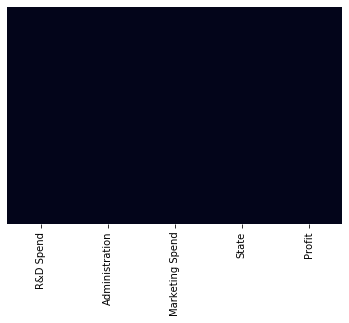

In [5]:
sns.heatmap(data = dataset.isnull() , yticklabels = False , cbar = False)

In [6]:
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [7]:
sns.set_style('whitegrid')


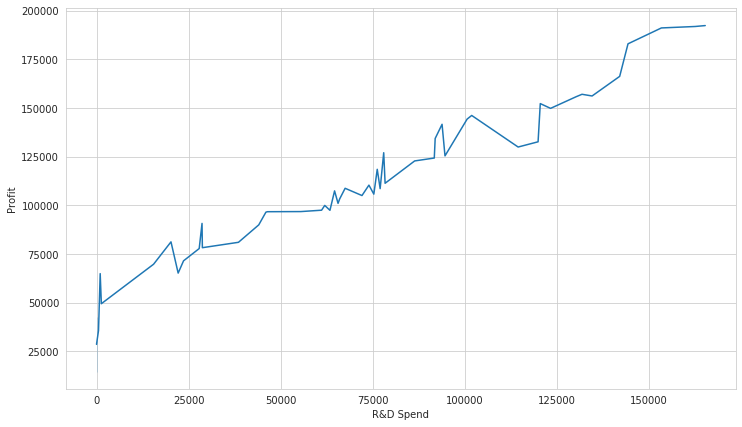

In [8]:
plt.figure(figsize = (12,7))

sns.lineplot(x = 'R&D Spend' , y = 'Profit' , data = dataset)


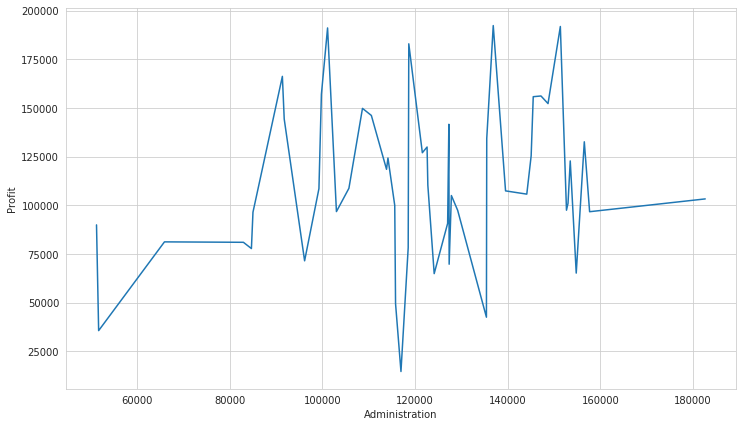

In [9]:
plt.figure(figsize = (12,7))

sns.lineplot(x = 'Administration' , y = 'Profit' , data = dataset)


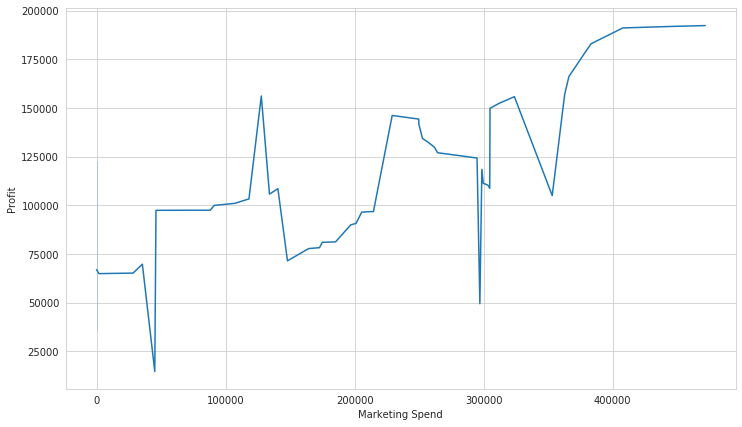

In [10]:
plt.figure(figsize = (12,7))

sns.lineplot(x = 'Marketing Spend' , y = 'Profit' , data = dataset)


Conclusion from analyzing the data :: R&D affect the profit more often than marketing and administration

# Handle Categorical Data and split the dataset

In [11]:
dataset['State'].value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

In [12]:
state = pd.get_dummies(dataset['State'] , drop_first = True)

In [13]:
#state

In [14]:
dataset.drop('State' , axis = 1 , inplace = True)

In [15]:
dataset = pd.concat([dataset , state] , axis = 1)

In [16]:
X = dataset[['R&D Spend', 'Administration', 'Marketing Spend','Florida','New York']]
y = dataset['Profit']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
Xtrain , Xtest , ytrain , ytest = train_test_split(X , y , test_size = 0.24 , random_state = 0)

# Train The Model

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr = LinearRegression()

In [21]:
lr.fit(Xtrain , ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Test the model

In [22]:
pred = lr.predict(Xtest)

In [23]:
pred = pd.DataFrame(data = pred)

In [24]:
error = pred - ytest

# Backward Elimination

In [55]:
import statsmodels.api as sm

In [26]:
np.shape(X)[0]

50

In [46]:
X = np.append(arr = np.ones((np.shape(X)[0] , 1)).astype(int) , values = X , axis = 1  )

In [47]:
X = pd.DataFrame(data = X)

In [43]:
X

,0,1,2,3,4,5,6
0,1.0,1.0,165349.20,136897.80,471784.10,0.0,1.0
1,1.0,1.0,162597.70,151377.59,443898.53,0.0,0.0
2,1.0,1.0,153441.51,101145.55,407934.54,1.0,0.0
3,1.0,1.0,144372.41,118671.85,383199.62,0.0,1.0
4,1.0,1.0,142107.34,91391.77,366168.42,1.0,0.0
5,1.0,1.0,131876.90,99814.71,362861.36,0.0,1.0
6,1.0,1.0,134615.46,147198.87,127716.82,0.0,0.0
7,1.0,1.0,130298.13,145530.06,323876.68,1.0,0.0
8,1.0,1.0,120542.52,148718.95,311613.29,0.0,1.0
9,1.0,1.0,123334.88,108679.17,304981.62,0.0,0.0


In [48]:
X

,0,1,2,3,4,5
0,1.0,165349.20,136897.80,471784.10,0.0,1.0
1,1.0,162597.70,151377.59,443898.53,0.0,0.0
2,1.0,153441.51,101145.55,407934.54,1.0,0.0
3,1.0,144372.41,118671.85,383199.62,0.0,1.0
4,1.0,142107.34,91391.77,366168.42,1.0,0.0
5,1.0,131876.90,99814.71,362861.36,0.0,1.0
6,1.0,134615.46,147198.87,127716.82,0.0,0.0
7,1.0,130298.13,145530.06,323876.68,1.0,0.0
8,1.0,120542.52,148718.95,311613.29,0.0,1.0
9,1.0,123334.88,108679.17,304981.62,0.0,0.0


Now We have to use another regressor to fit the model

WE Have TO Look For The P values(Probability Values) and eliminate those columns which have values greater than 0.05 

and again train the model to check for p values

In [49]:
X.columns

RangeIndex(start=0, stop=6, step=1)

In [58]:
X_opt = X.loc[:,[0,1,2,3,4,5]]

In [59]:
regressor_OLS = sm.OLS(endog = y , exog = X_opt).fit()

In [60]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Fri, 10 Jan 2020   Prob (F-statistic):           1.34e-27
Time:                        00:30:31   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0           5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
1              0.8060      0.046     17.369      0.000       0.712       0.900
2             -0.0270      0.052     -0.517      0.608      -0.132       0.078
3              0.0270      0.017      1.574      0.123      -0.008       0.062
4            198.7888   3371.007      0.059      0.953   -6595.030    6992.607
5            -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
X_opt = X.loc[:,[0,1,2,3,4]]
regressor_OLS = sm.OLS(endog = y , exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Fri, 10 Jan 2020   Prob (F-statistic):           8.49e-29
Time:                        00:37:51   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0           5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
1              0.8060      0.046     17.606      0.000       0.714       0.898
2             -0.0270      0.052     -0.523      0.604      -0.131       0.077
3              0.0270      0.017      1.592      0.118      -0.007       0.061
4            220.1585   2900.536      0.076      0.940   -5621.821    6062.138
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
X_opt = X.loc[:,[0,1,2,3]]
regressor_OLS = sm.OLS(endog = y , exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 10 Jan 2020   Prob (F-statistic):           4.53e-30
Time:                        00:38:08   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0           5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
1              0.8057      0.045     17.846      0.000       0.715       0.897
2             -0.0268      0.051     -0.526      0.602      -0.130       0.076
3              0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
X_opt = X.loc[:,[0,1,3]]
regressor_OLS = sm.OLS(endog = y , exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Fri, 10 Jan 2020   Prob (F-statistic):           2.16e-31
Time:                        00:38:34   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0           4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
1              0.7966      0.041     19.266      0.000       0.713       0.880
3              0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
X_opt = X.loc[:,[0,1]]
regressor_OLS = sm.OLS(endog = y , exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Fri, 10 Jan 2020   Prob (F-statistic):           3.50e-32
Time:                        00:38:52   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0           4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
1              0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""